### Import your librares

In [36]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Load your dataset

In [20]:
data=pd.read_csv('seattle_weather.csv')

In [21]:
data

,DATE,PRCP,TMAX,TMIN,RAIN
0,1948-01-01,0.47,51,42,True
1,1948-01-02,0.59,45,36,True
2,1948-01-03,0.42,45,35,True
3,1948-01-04,0.31,45,34,True
4,1948-01-05,0.17,45,32,True
...,...,...,...,...,...
25546,2017-12-10,0.00,49,34,False
25547,2017-12-11,0.00,49,29,False
25548,2017-12-12,0.00,46,32,False
25549,2017-12-13,0.00,48,34,False


### Repeat the following steps for each column within outliers

* Visualize the outliers
* Detect if your data set contains any outliers
* Identify lower & higher limit of outliers
* Drop all outliers
* Visualize the column after processing


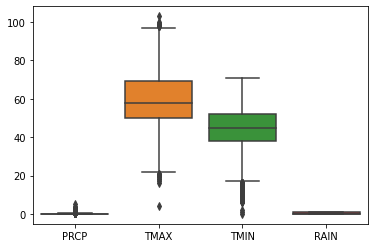

In [22]:
sns.boxplot(data=data);

In [26]:
def get_upperAndLower(col,df):
        q1=np.percentile(df[col],25,method='midpoint')
        q3=np.percentile(df[col],75,method='midpoint')
        iqr=q3-q1
        lower,upper=(q1-(1.5*iqr)),(q3+(1.5*iqr))
        df=df.drop(index=df[(df[col]>upper) | (df[col]<lower)].index)
        return df

In [27]:
df=data.copy()
df=get_upperAndLower('TMAX',df)
df=get_upperAndLower('TMIN',df)

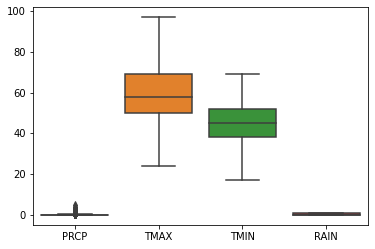

In [28]:
sns.boxplot(data=df);

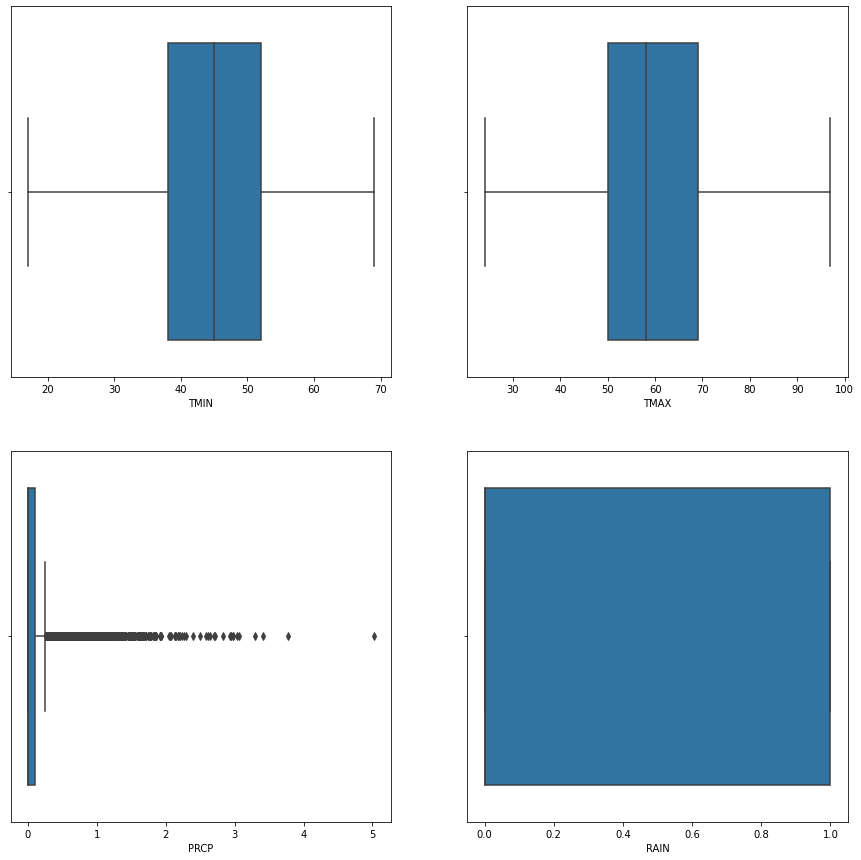

In [39]:
fig, axes = plt.subplots(2, 2,figsize=(15, 15))
sns.boxplot(data=df,x='TMIN',ax=axes[0,0])
sns.boxplot(data=df,x='TMAX',ax=axes[0,1])
sns.boxplot(data=df,x='PRCP',ax=axes[1,0])
sns.boxplot(data=df,x='RAIN',ax=axes[1,1]);